## HR Analytics Employee Attrition & Performance
#### By: Naveen B

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists

#### Loading required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


#### Importing Dataset

In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
data.head() #First 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.shape #Shape of dataset

(1470, 35)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Checking for Missing values

In [6]:
data.isnull().sum() #No missing values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

##### Five Number Summary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
data.select_dtypes("object") #Features with object datatype

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [9]:
data.Attrition.replace({"Yes":1,"No":0},inplace=True)

In [10]:
zero_var=[]
for col in data.select_dtypes(exclude='object').columns:
    if data[col].var()==0: #Checking for zero variance features
        zero_var.append(col)
print("Columns exibiting Zero variance are :",zero_var)

Columns exibiting Zero variance are : ['EmployeeCount', 'StandardHours']


In [11]:
data.drop(zero_var,axis=1,inplace=True) # Dropping columns with zero variance

In [12]:
data.drop(["EmployeeNumber","Over18"],axis=1,inplace=True) # Dropping Employee number as its an unique identification number and over18 as all employees are of age abovr 18

### Univariate Analysis

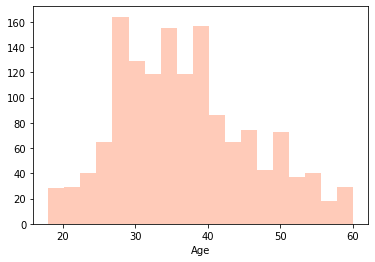

In [13]:
sns.distplot(data.Age,color="coral",kde=False);

#### Employees are from age group of 18-60

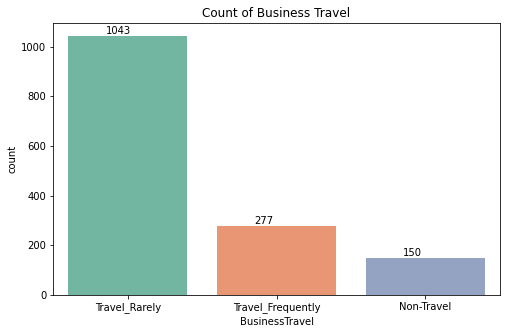

In [14]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.BusinessTravel,palette="Set2");
plt.title("Count of Business Travel")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Most of the employees travel rarely

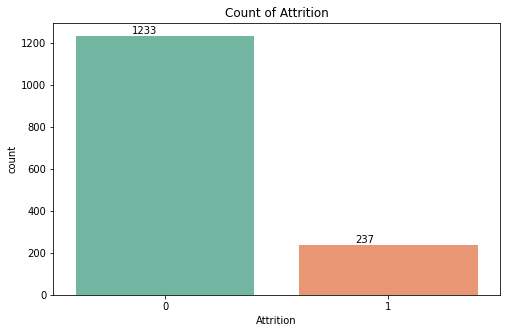

In [15]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.Attrition,palette="Set2");
plt.title("Count of Attrition")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Out of all employees less than 10% account for attrition

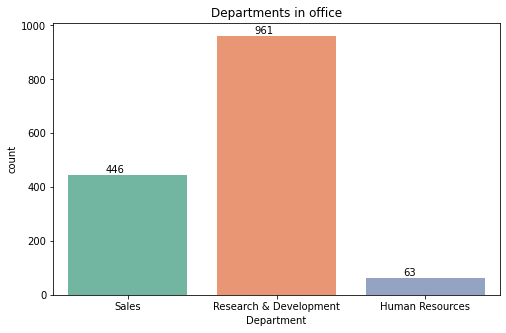

In [16]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.Department,palette="Set2");
plt.title("Departments in office")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

#####  High volumne of the employees are from Research and Development department

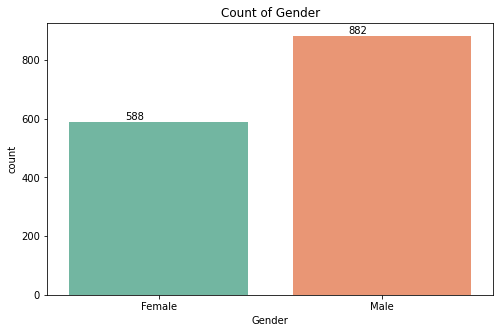

In [17]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.Gender,palette="Set2");
plt.title("Count of Gender")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Male employees are more in the office

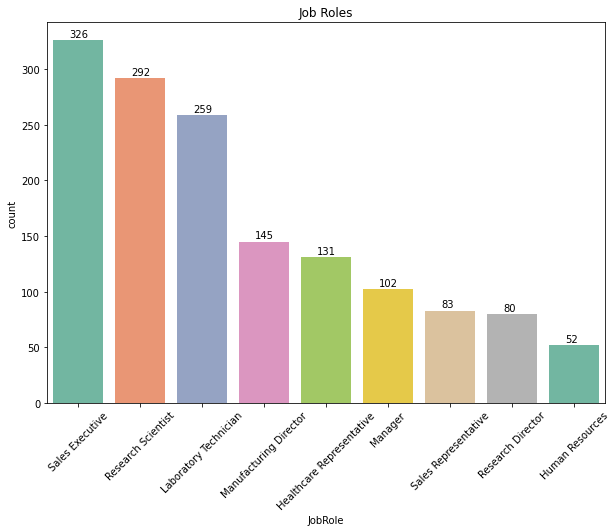

In [18]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data.JobRole,palette="Set2");
plt.title("Job Roles")
plt.xticks(rotation=45);
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Sale Excecutive in high number followed by Research and Development department employees 

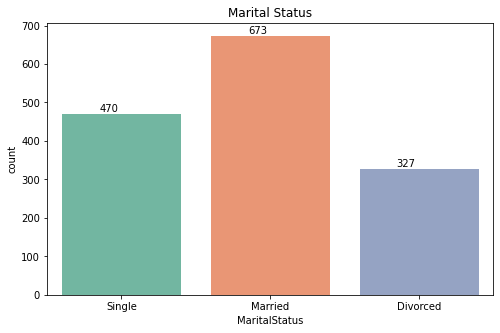

In [19]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.MaritalStatus,palette="Set2");
plt.title("Marital Status")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Married employees are high in number still at equal ratio with employees who are not in a relationship

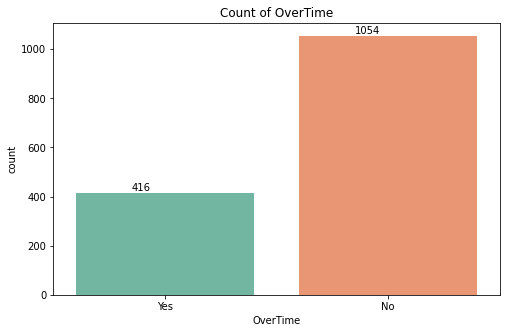

In [20]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data.OverTime,palette="Set2");
plt.title("Count of OverTime")
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

##### Majority employees doesn't opt for working Over Time

### Bi-Variate Analysis

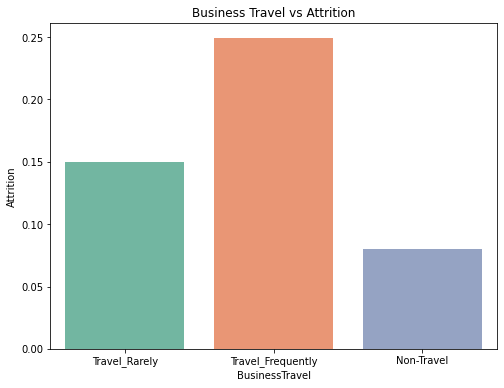

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="BusinessTravel",y="Attrition",palette="Set2",ci=None);
plt.title("Business Travel vs Attrition")
plt.show()

##### Employees who travel frequently have high attrition rate

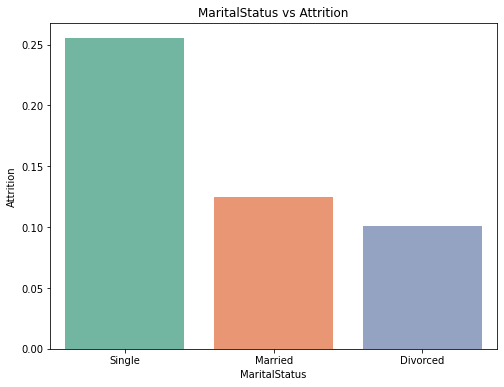

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="MaritalStatus",y="Attrition",palette="Set2",ci=None);
plt.title("MaritalStatus vs Attrition")
plt.show()

##### Employees who are single tend to leave the job more

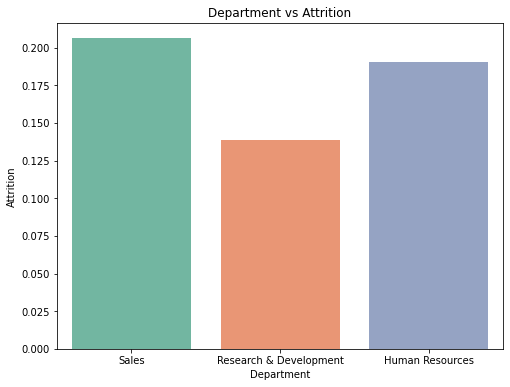

In [23]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="Department",y="Attrition",palette="Set2",ci=None);
plt.title("Department vs Attrition")
plt.show()

##### Employees Sales department leaving the job more.

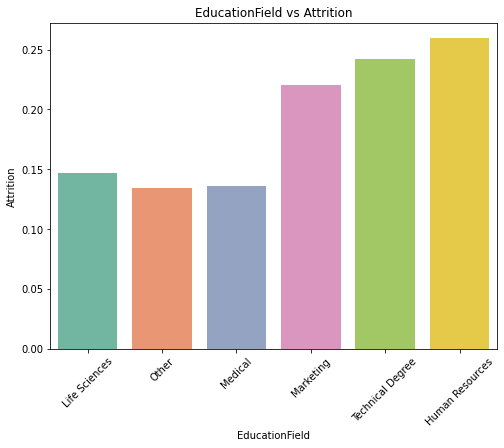

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="EducationField",y="Attrition",palette="Set2",ci=None);
plt.title("EducationField vs Attrition")
plt.xticks(rotation=45)
plt.show()

##### Employees from Human Resource education field have high attririon rate

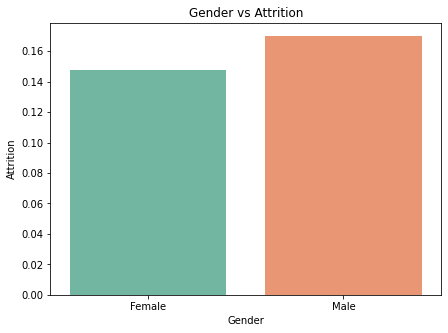

In [25]:
plt.figure(figsize=(7,5))
sns.barplot(data=data,x="Gender",y="Attrition",palette="Set2",ci=None);
plt.title("Gender vs Attrition")
plt.show()

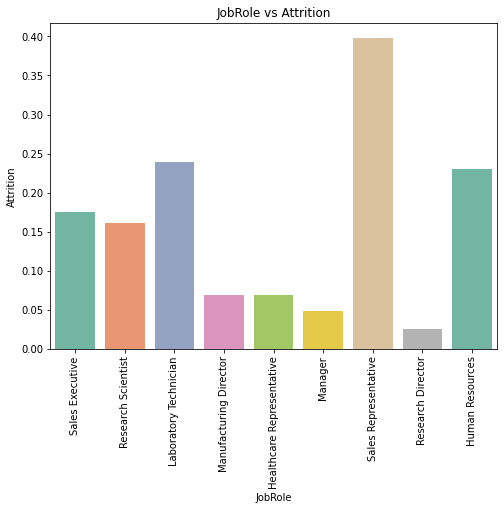

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="JobRole",y="Attrition",palette="Set2",ci=None);
plt.title("JobRole vs Attrition")
plt.xticks(rotation=90)
plt.show()

#### Multi-Variate Analysis

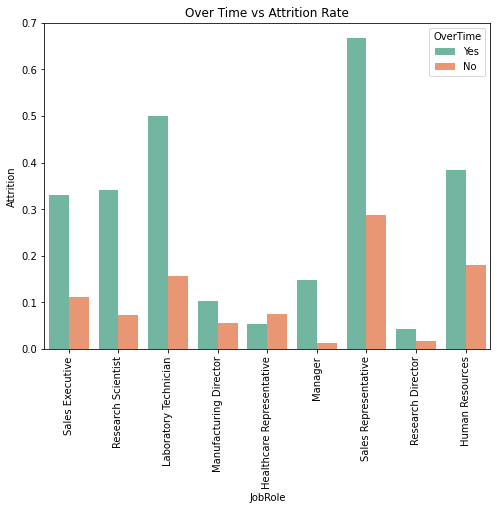

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="JobRole",y="Attrition",hue="OverTime",palette="Set2",ci=None);
plt.title("Over Time vs Attrition Rate")
plt.xticks(rotation=90)
plt.show()

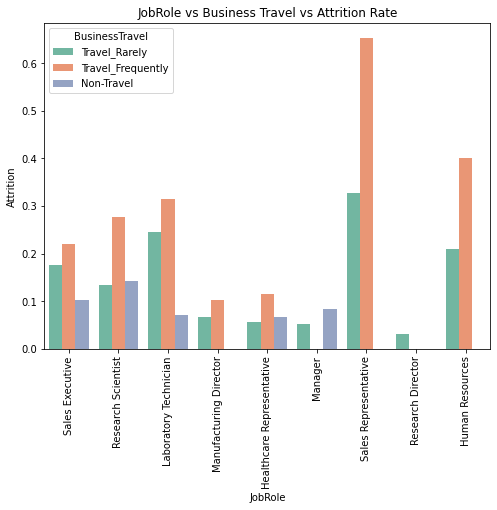

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="JobRole",y="Attrition",hue="BusinessTravel",palette="Set2",ci=None);
plt.title("JobRole vs Business Travel vs Attrition Rate")
plt.xticks(rotation=90)
plt.show()

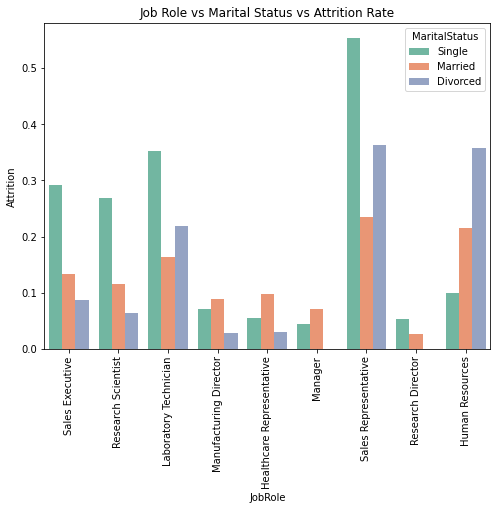

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="JobRole",y="Attrition",hue="MaritalStatus",palette="Set2",ci=None);
plt.title("Job Role vs Marital Status vs Attrition Rate")
plt.xticks(rotation=90)
plt.show()

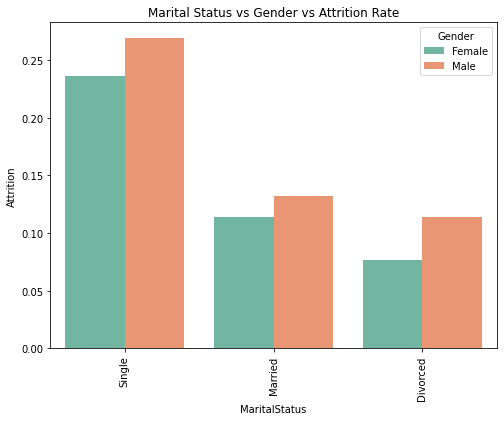

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="MaritalStatus",y="Attrition",hue="Gender",palette="Set2",ci=None);
plt.title("Marital Status vs Gender vs Attrition Rate")
plt.xticks(rotation=90)
plt.show()

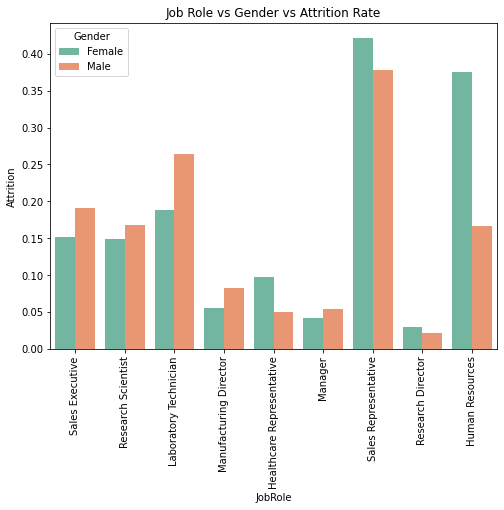

In [31]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,x="JobRole",y="Attrition",hue="Gender",palette="Set2",ci=None);
plt.title("Job Role vs Gender vs Attrition Rate")
plt.xticks(rotation=90)
plt.show()

### Insights from Mulitvariate Analysis
- Employees Sales department who are single travel frequently and work overtime have higher attrition rate.
- Divorced Male employees from Human Resource education field, who travel frequently have high attririon rate.
- Laboratory Technicain who are single travel frequently and work overtime have higher attrition rate.
- Male employees tend to have a high attrition rate.

#### Seperating Dependent and Independent variables

In [32]:
X=data.drop("Attrition",axis=1)
y=data.Attrition

In [33]:
X.select_dtypes("object").nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [34]:
#Manual Encoding ordinal data
X["Gender"]=X["Gender"].replace({"Male":1,"Female":0})
X["OverTime"]=X["OverTime"].replace({"Yes":1,"No":0})
X["BusinessTravel"]=X["BusinessTravel"].replace({"Non-Travel":0,'Travel_Rarely':1,'Travel_Frequently':2})

In [35]:
ohe=OneHotEncoder() #One hot Encoding nominal data
X_obj=X.select_dtypes("object")
X_code=ohe.fit_transform(X_obj).toarray()
X_new=pd.concat([pd.DataFrame(X_code,columns=ohe.get_feature_names(X_obj.columns)),X.select_dtypes(exclude="object")],axis=1)

#### Splitting data to Training and Validation dataset

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=.20,random_state=10)

In [37]:
X_train.shape,y_train.shape

((1176, 47), (1176,))

### Model Building
#### Logistic Regression

In [38]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print("Accuracy for validatation data : ",lg.score(X_test,y_test))

Accuracy for validatation data :  0.8129251700680272


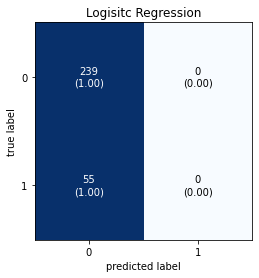

In [40]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,lg.predict(X_test)),show_absolute=True,show_normed=True);
plt.title("Logisitc Regression");

In [41]:
print("Classification Report - Logistic Regression\n")
print(classification_report(y_test,lg.predict(X_test)))

Classification Report - Logistic Regression

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       239
           1       0.00      0.00      0.00        55

    accuracy                           0.81       294
   macro avg       0.41      0.50      0.45       294
weighted avg       0.66      0.81      0.73       294



In [42]:
# Misclassification of attrition is more with precision and recall 0 
# This may be due to imbalance in dependent variable

#### Random Forest Classifier

In [43]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
print("Accuracy for validatationd data : ",rf.score(X_test,y_test))

Accuracy for validatationd data :  0.8367346938775511


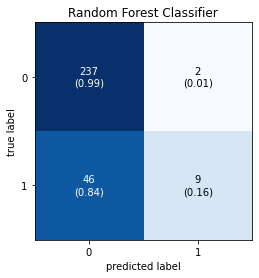

In [45]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test,rf.predict(X_test)),show_absolute=True,show_normed=True);
plt.title("Random Forest Classifier");

In [46]:
print("Classification Report - Random Forest Classifier\n")
print(classification_report(y_test,rf.predict(X_test)))

Classification Report - Random Forest Classifier

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       239
           1       0.82      0.16      0.27        55

    accuracy                           0.84       294
   macro avg       0.83      0.58      0.59       294
weighted avg       0.83      0.84      0.79       294



In [47]:
# Attrition have low recall and most 80% of attrition is misclassified as no attrition

#### Applying Sythetic oversampling Technique (**SMOTE**) to overcome data imbalance

In [48]:
smote=SMOTE(sampling_strategy=1.0,random_state=10)

In [49]:
X_smote,y_smote=smote.fit_sample(X_new,y)

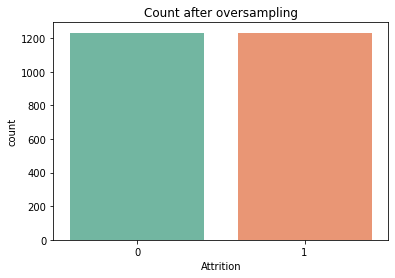

In [50]:
sns.countplot(y_smote,palette="Set2");
plt.title("Count after oversampling");

In [51]:
X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=.20,random_state=10) #Splitting oversampled data

### Logistic Regression after OverSampling

In [52]:
lg_os=LogisticRegression()
lg_os.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

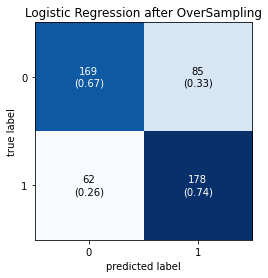

In [53]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test_smote,lg_os.predict(X_test_smote)),show_absolute=True,show_normed=True);
plt.title("Logistic Regression after OverSampling");

In [54]:
print("Classification Report - Logistic Regression\n")
print(classification_report(y_test_smote,lg_os.predict(X_test_smote)))

Classification Report - Logistic Regression

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       254
           1       0.68      0.74      0.71       240

    accuracy                           0.70       494
   macro avg       0.70      0.70      0.70       494
weighted avg       0.70      0.70      0.70       494



### Random Forest after OverSampling

In [55]:
rf_os=RandomForestClassifier(max_depth=30,n_estimators=100, min_samples_leaf=40,min_samples_split=100, random_state=10)
rf_os.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

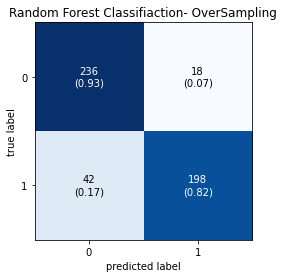

In [56]:
plot_confusion_matrix(conf_mat=confusion_matrix(y_test_smote,rf_os.predict(X_test_smote)),show_absolute=True,show_normed=True);
plt.title("Random Forest Classifiaction- OverSampling");

In [57]:
print("Classification Report - Random Forest Classifiaction\n")
print(classification_report(y_test_smote,rf_os.predict(X_test_smote)))

Classification Report - Random Forest Classifiaction

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       254
           1       0.92      0.82      0.87       240

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494



In [58]:
print("Train Accuracy : {} \nTest Accuracy  : {} ".format(rf_os.score(X_train_smote,y_train_smote),rf_os.score(X_test_smote,y_test_smote)))

Train Accuracy : 0.8904665314401623 
Test Accuracy  : 0.8785425101214575 
